In [1]:
from michigrad.engine import Value
from michigrad.visualize import show_graph, show_graph_interactive
import numpy as np

In [2]:
a = Value(2,name='a')
b = Value(5,name='b')
c = Value(5,name='c')
f = (a*b)+c
f.name='f'

In [3]:
c = a+b

In [4]:
c.name='c'

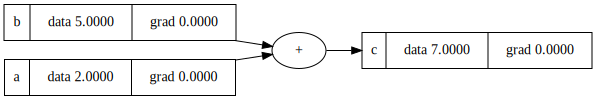

In [5]:
show_graph(c)

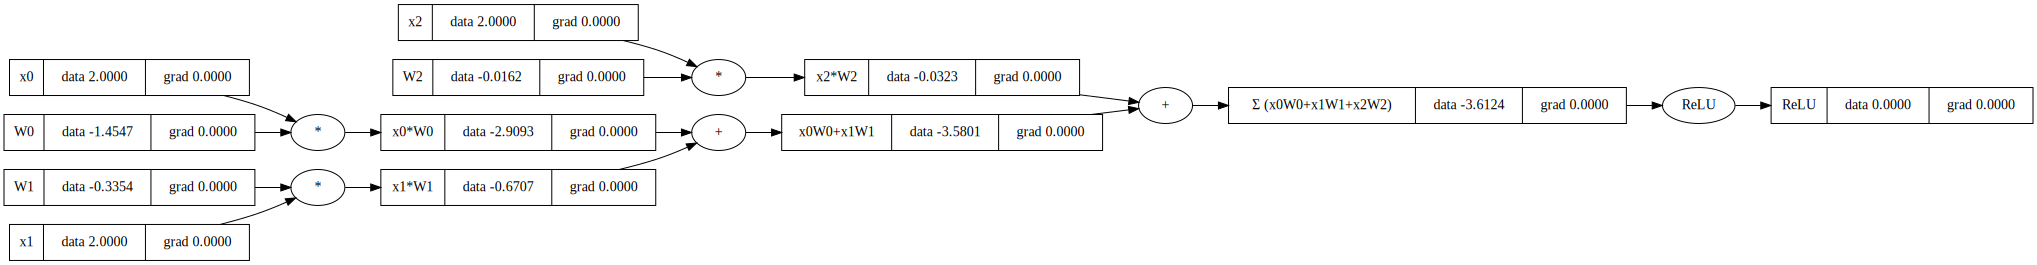

In [6]:
# ReLU(x0 * W0 + x1 * W1)
x0 = Value(2,name='x0')
x1 = Value(2,name='x1')
x2 = Value(2,name='x2')
W0 = Value(np.random.randn(), name=f'W0')
W1 = Value(np.random.randn(), name=f'W1')
W2 = Value(np.random.randn(), name=f'W2')
x0W0 = x0 * W0
x0W0.name = 'x0*W0'
x1W1 = x1 * W1
x1W1.name = 'x1*W1'
x2W2 = x2 * W2
x2W2.name = 'x2*W2'
suma1 = x0W0 + x1W1
suma1.name = 'x0W0+x1W1'
suma2 = suma1 + x2W2
suma2.name = 'Σ (x0W0+x1W1+x2W2)'
#suma2.name = "Σ"
relu = suma2.relu()
relu.name = "ReLU"
show_graph(relu)

In [7]:
show_graph_interactive(relu)

graph.html
